In [18]:
import json
import requests
#from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

In [19]:
# Load a file as a DataFrame and assign to df
df = pd.read_excel("Data/Incosistencias en reclamacion.xlsx")

In [20]:
df.drop_duplicates().reset_index(drop=True)
df

,IDENTIFICACIÓN,TIPO NOVEDAD,TIPO EVENTO,NOVEDAD,FE_REGISTRO,OBSERVACIONES
0,1729172,INCONSISTENCIAS EN LA RECLAMACION,AUTORIZAN MX PARA OTRO PROVEEDOR,NaN,2012-07-03,"OMALIZUMAB XOLAIR, LAS 3 PRIMERAS APLICACIONES..."
1,852244,INCONSISTENCIAS EN LA RECLAMACION,INCONVENIENTES CON LA AUTORIZACION DEL MEDICAM...,NaN,2012-04-02,NaN
2,1001619,INCONSISTENCIAS EN LA RECLAMACION,INCONVENIENTES PERSONALES PARA RECLAMARLO,NaN,2012-07-06,OMALIZUMAB- PACIENTE QUE RELATA QUE NO PUDO AS...
3,852244,INCONSISTENCIAS EN LA RECLAMACION,DESCONOCIMIENTO DE TRAMITES,NaN,2012-11-15,salmeterol/fluticasona y montelukast\r\n
4,811451,INCONSISTENCIAS EN LA RECLAMACION,PACIENTE NO CONTACTADO,NaN,2012-12-11,se habla con la hija andrea quien brinda el nu...
...,...,...,...,...,...,...
7679,1406735,INCONSISTENCIAS EN LA RECLAMACION,DESCONOCIMIENTO DE TRAMITES,NaN,2020-05-18,29631 - MEPOLIZUMAB - se agenda cita apra el d...
7680,903409,NUEVO INCONSISTENTE,SE AGENDA CITA DE APLICACION,NaN,2020-05-18,OMALIZUMAB 150MG- OMALIZUMAB 75MG- OK CITA 202...
7681,1745421,NUEVO INCONSISTENTE,SE AGENDA CITA DE APLICACION,NaN,2020-05-21,OMALIZUMAB- OK CITA 2020/05/28 01:30 PM. RG MV...
7682,1676822,INCONSISTENCIAS EN LA RECLAMACION,HOSPITALIZADO,NaN,2020-05-29,NaN


In [21]:
col = np.char.lower(np.array(df.keys(), dtype='U'))
col[0] = 'id'
col[-2] = 'fecha'

In [22]:
df.columns = col

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7684 entries, 0 to 7683
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7684 non-null   int64  
 1   tipo novedad   7684 non-null   object 
 2   tipo evento    7684 non-null   object 
 3   novedad        0 non-null      float64
 4   fecha          7684 non-null   object 
 5   observaciones  6967 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 360.3+ KB


In [24]:
# Cambiar texto a minuscula.
a = df['tipo novedad'].dtype

for col in df.columns:
    if df[col].dtype == a:
        df[col] = df[col].str.lower()
df

,id,tipo novedad,tipo evento,novedad,fecha,observaciones
0,1729172,inconsistencias en la reclamacion,autorizan mx para otro proveedor,NaN,2012-07-03,"omalizumab xolair, las 3 primeras aplicaciones..."
1,852244,inconsistencias en la reclamacion,inconvenientes con la autorizacion del medicam...,NaN,2012-04-02,NaN
2,1001619,inconsistencias en la reclamacion,inconvenientes personales para reclamarlo,NaN,2012-07-06,omalizumab- paciente que relata que no pudo as...
3,852244,inconsistencias en la reclamacion,desconocimiento de tramites,NaN,2012-11-15,salmeterol/fluticasona y montelukast\r\n
4,811451,inconsistencias en la reclamacion,paciente no contactado,NaN,2012-12-11,se habla con la hija andrea quien brinda el nu...
...,...,...,...,...,...,...
7679,1406735,inconsistencias en la reclamacion,desconocimiento de tramites,NaN,2020-05-18,29631 - mepolizumab - se agenda cita apra el d...
7680,903409,nuevo inconsistente,se agenda cita de aplicacion,NaN,2020-05-18,omalizumab 150mg- omalizumab 75mg- ok cita 202...
7681,1745421,nuevo inconsistente,se agenda cita de aplicacion,NaN,2020-05-21,omalizumab- ok cita 2020/05/28 01:30 pm. rg mv...
7682,1676822,inconsistencias en la reclamacion,hospitalizado,NaN,2020-05-29,NaN


## ID analisis ##

In [25]:
id_df = pd.DataFrame(df["id"].value_counts()).reset_index()
id_df.columns = ['id', 'count']
print(id_df['count'].sum())
id_df

7684


,id,count
0,1194113,56
1,1769865,52
2,693609,49
3,1786149,46
4,1916799,45
...,...,...
724,1488532,1
725,1656434,1
726,1439344,1
727,1952829,1


In [26]:
pd.DataFrame(df["tipo novedad"].value_counts()).reset_index()

,index,tipo novedad
0,nuevo inconsistente,3844
1,inconsistencias en la reclamacion,3840


## Evento y Observación Analisis ##

In [38]:
pd.DataFrame(df ["tipo evento"].value_counts()).reset_index()

,index,tipo evento
0,confirmacion de cita,2208
1,se agenda cita de aplicacion,913
2,paciente no contactado,860
3,paciente no inconsistente reclamo medicamento,774
4,inconvenientes personales para reclamarlo,383
5,sin mx por falta de oportunidad de cita,347
6,inconvenientes con la autorizacion del medicam...,329
7,olvido del paciente,329
8,cambio de tratamiento,187
9,desconocimiento de tramites,137


In [36]:
pd.DataFrame(df[df["tipo novedad"] == 'nuevo inconsistente'] ["tipo evento"].value_counts()).reset_index()

,index,tipo evento
0,confirmacion de cita,2208
1,se agenda cita de aplicacion,913
2,inconvenientes personales para reclamarlo,121
3,olvido de paciente,110
4,se remite a consulta de sft,98
5,paciente ya reclamo medicamento,95
6,paciente no contactado,80
7,envio de medicamento a domicilio,64
8,desconocimiento de trámites,41
9,aun no le corresponde entrega,20


In [37]:
pd.DataFrame(df[df["tipo novedad"] == 'inconsistencias en la reclamacion'] ["tipo evento"].value_counts()).reset_index()

,index,tipo evento
0,paciente no contactado,780
1,paciente no inconsistente reclamo medicamento,774
2,sin mx por falta de oportunidad de cita,347
3,inconvenientes con la autorizacion del medicam...,329
4,olvido del paciente,329
5,inconvenientes personales para reclamarlo,262
6,cambio de tratamiento,187
7,desconocimiento de tramites,137
8,paciente reclama por intervención previa,132
9,medico lo suspende,115


## Analisis Fecha##

In [29]:
df["fecha"]= pd.to_datetime(df['fecha'])
date_df = pd.DataFrame(df["fecha"].value_counts()).reset_index()
date_df.columns = ['fecha', 'count']
date_df = date_df.sort_values(by=['fecha']).reset_index()
date_df

,index,fecha,count
0,1002,2012-04-02,1
1,933,2012-05-17,1
2,891,2012-05-26,1
3,1012,2012-06-07,1
4,962,2012-06-26,1
...,...,...,...
1196,1033,2020-04-22,1
1197,1019,2020-05-13,1
1198,759,2020-05-18,2
1199,1015,2020-05-21,1


Text(0, 0.5, 'inconsistencias')

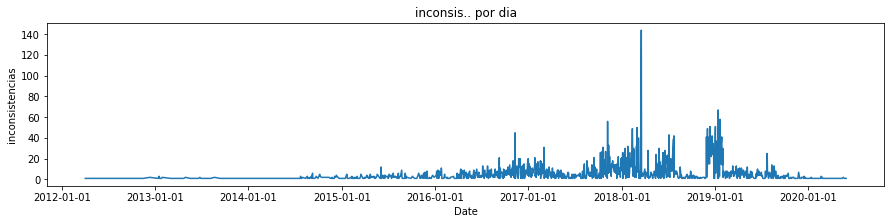

In [30]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(date_df["fecha"], date_df["count"])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))  # format x-axis display
plt.title("inconsis.. por dia")
plt.xlabel("Date")
plt.ylabel("inconsistencias")

## Observaciones ##

In [34]:
pd.DataFrame(df[df["tipo novedad"] == 'nuevo inconsistente'] ["observaciones"].value_counts()).reset_index()

,index,observaciones
0,21755 omalizumab 150 mg - se realiza comunicac...,41
1,21755 omalizumab 150 mg - se realiza comunicac...,39
2,21755 - omalizumab 150 mg polvo liofilizado pa...,31
3,21755 omalizuamb 150 mg - se realiza comunicac...,31
4,21755 omalizumab 150 mg - se realiza comunicac...,25
...,...,...
2566,29140 omalizumab 150 mg - se realiza comunicac...,1
2567,29140 - omalizumab\r\nno s elogra comunicacion...,1
2568,2017-11-29\t10:40 am\r\nomalizumab 150 mg\r\nr...,1
2569,21755\tomalizumab 150 mg polv iny (xolair)-217...,1


In [35]:
pd.DataFrame(df[df["tipo novedad"] == 'inconsistencias en la reclamacion'] ["observaciones"].value_counts()).reset_index()

,index,observaciones
0,omalizumab 150 mg polv iny (xolair)-21755-4896...,25
1,omalizumab 150 mg polv iny (xolair)-21755-4896...,11
2,omalizumab 150 mg polv iny (xolair)-21755-4896...,8
3,omalizumab 150 mg polv iny (xolair)-21755-4896...,4
4,omalizumab 150 mg polv iny (xolair)-21755-4896...,4
...,...,...
3220,omalizumab 150 mg polv iny (xolair)-21755-4896...,1
3221,omalizumab 150 mg- paciente reclamo medicament...,1
3222,paciente que se llama informo que no ha llegad...,1
3223,budesonida/formoterol 160/4.5mcg susp x 120d (...,1


In [32]:
pd.DataFrame(df["observaciones"].value_counts()).reset_index().iloc[0,0]

'21755 omalizumab 150 mg - se realiza comunicacion con  familiar del  paciente y se le dan indicaciones previas para la aplicacion del medicamento  rg jpelaez 16/03/2018  '

In [33]:
pd.DataFrame(df["observaciones"].value_counts()).reset_index().iloc[1,0]

'21755 omalizumab 150 mg - se realiza comunicacion con  familiar del  paciente y se le dan indicaciones previas para la aplicacion del medicamento  rg jpelaez 14/03/2018  '